In [2]:
import json
import pandas as pd

In [4]:
file = open("acndata_sessions.json")
data = json.load(file)

In [5]:
data.keys()

dict_keys(['_meta', '_items'])

In [6]:
len(data["_items"])

31424

In [7]:
# Data Fields in the dataset
list(data["_items"][0].keys())

['_id',
 'clusterID',
 'connectionTime',
 'disconnectTime',
 'doneChargingTime',
 'kWhDelivered',
 'sessionID',
 'siteID',
 'spaceID',
 'stationID',
 'timezone',
 'userID',
 'userInputs']

In [8]:
#uploading data to dataframe
df = pd.DataFrame(data["_items"])

In [9]:
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None


In [10]:
connTimes = list(df.connectionTime.values)

In [11]:
# converting time data to datetime objects
import datetime

In [12]:
connTimes[:10]

['Wed, 25 Apr 2018 11:08:04 GMT',
 'Wed, 25 Apr 2018 13:45:10 GMT',
 'Wed, 25 Apr 2018 13:45:50 GMT',
 'Wed, 25 Apr 2018 14:37:06 GMT',
 'Wed, 25 Apr 2018 14:40:34 GMT',
 'Wed, 25 Apr 2018 14:43:50 GMT',
 'Wed, 25 Apr 2018 14:47:42 GMT',
 'Wed, 25 Apr 2018 14:58:25 GMT',
 'Wed, 25 Apr 2018 15:10:52 GMT',
 'Wed, 25 Apr 2018 15:12:11 GMT']

In [13]:
df["connectionTime"] = df["connectionTime"].apply(lambda dt : datetime.datetime.strptime(dt, '%a, %d %b %Y %H:%M:%S %Z'))

In [14]:
df["connectionTime"].head(5)

0   2018-04-25 11:08:04
1   2018-04-25 13:45:10
2   2018-04-25 13:45:50
3   2018-04-25 14:37:06
4   2018-04-25 14:40:34
Name: connectionTime, dtype: datetime64[ns]

In [15]:
df["doneChargingTime"] = df["doneChargingTime"].apply(lambda dt : datetime.datetime.strptime(dt, '%a, %d %b %Y %H:%M:%S %Z') if dt else None)

In [16]:
df["disconnectTime"] = df["disconnectTime"].apply(lambda dt : datetime.datetime.strptime(dt, '%a, %d %b %Y %H:%M:%S %Z'))

In [17]:
df.head(10)

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None
5,5bc90cb9f9af8b0d7fe77cd7,0039,2018-04-25 14:43:50,2018-04-26 01:17:30,2018-04-25 16:18:28,7.910,2_39_139_28_2018-04-25 14:43:49.647430,0002,CA-303,2-39-139-28,America/Los_Angeles,None,None
6,5bc90cb9f9af8b0d7fe77cd8,0039,2018-04-25 14:47:42,2018-04-25 18:27:51,2018-04-25 18:27:42,15.294,2_39_91_441_2018-04-25 14:47:41.776352,0002,CA-499,2-39-91-441,America/Los_Angeles,None,None
7,5bc90cb9f9af8b0d7fe77cd9,0039,2018-04-25 14:58:25,2018-04-25 19:06:29,2018-04-25 16:48:29,6.953,2_39_79_377_2018-04-25 14:58:25.255583,0002,CA-325,2-39-79-377,America/Los_Angeles,None,None
8,5bc90cb9f9af8b0d7fe77cda,0039,2018-04-25 15:10:52,2018-04-25 18:15:46,2018-04-25 16:07:56,2.174,2_39_79_382_2018-04-25 15:10:51.871020,0002,CA-491,2-39-79-382,America/Los_Angeles,None,None
9,5bc90cb9f9af8b0d7fe77cdb,0039,2018-04-25 15:12:11,2018-04-25 18:29:21,2018-04-25 18:30:20,2.439,2_39_78_362_2018-04-25 15:12:10.901351,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None


In [18]:
(df["disconnectTime"][0] - df["connectionTime"][0]).total_seconds()

7926.0

In [19]:
totalConnectionTime = []
totalChargingTime = []
connectionTime = list(df.connectionTime)
disconnectTime = list(df.disconnectTime)
doneChargingTime = list(df.doneChargingTime)

In [20]:
len(connectionTime) == len(disconnectTime) == len(doneChargingTime)

True

In [21]:
for cT, dT in zip(connectionTime, disconnectTime):
    if cT and dT:
        totalConnectionTime.append((dT - cT).total_seconds())
    else:
        totalConnectionTime.append(None)

In [22]:
len(connectionTime) == len(disconnectTime) == len(doneChargingTime) == len(totalConnectionTime)

True

In [23]:
totalConnectionTime[:10]

[7926.0,
 40266.0,
 33535.0,
 33508.0,
 30158.0,
 38020.0,
 13209.0,
 14884.0,
 11094.0,
 11830.0]

In [24]:
for cT, dCt in zip(connectionTime, doneChargingTime):
    if cT and dCt:
        totalChargingTime.append((dCt - cT).total_seconds())
    else:
        totalChargingTime.append(None)

In [25]:
len(connectionTime) == len(disconnectTime) == len(doneChargingTime) == len(totalConnectionTime) == len(totalChargingTime)

True

In [26]:
totalChargingTime[:10]

[7986.0,
 10745.0,
 3954.0,
 5296.0,
 10796.0,
 5678.0,
 13200.0,
 6604.0,
 3424.0,
 11889.0]

In [27]:
df["totalChargingTime"] = totalChargingTime

In [28]:
df["totalConnectionTime"] = totalConnectionTime

Trying to find correlation


In [29]:
corr = df.corr("spearman")

In [30]:
import seaborn as sns

In [31]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  from ipykernel import kernelapp as app


,kWhDelivered,totalChargingTime,totalConnectionTime
kWhDelivered,1.00,0.71,0.31
totalChargingTime,0.71,1.00,0.60
totalConnectionTime,0.31,0.60,1.00


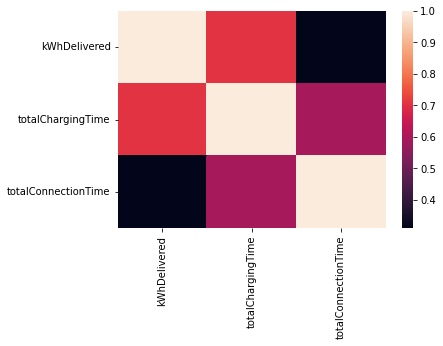

In [32]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

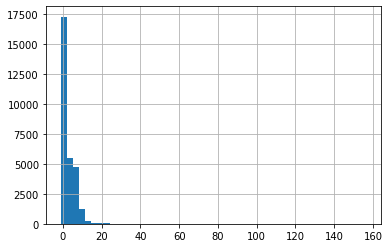

In [34]:
hist = (df["totalConnectionTime"]/(3600) - df["totalChargingTime"]/(3600)).hist(bins=50)

In [35]:
extraTime = pd.DataFrame()

In [38]:
extraTime["time"] = df["totalConnectionTime"]/(3600) - df["totalChargingTime"]/(3600)

In [39]:
extraTime

,time
0,-0.016667
1,8.200278
2,8.216944
3,7.836667
4,5.378333
...,...
31419,2.734722
31420,1.728333
31421,NaN
31422,1.493333


AxesSubplot(0.125,0.125;0.775x0.755)


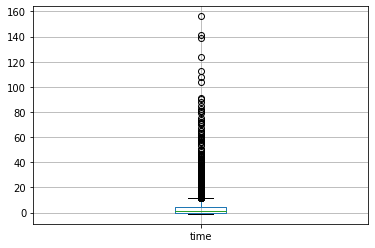

In [40]:
print(extraTime.boxplot(column=['time']))

In [41]:
df.to_csv("caltech.csv")